# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.151282e+01     6.894435e+00
 * time: 0.0017900466918945312
     1     2.906448e+01     4.823698e+00
 * time: 0.0066890716552734375
     2     2.054036e+01     5.171961e+00
 * time: 0.011831998825073242
     3     1.560055e+01     4.523441e+00
 * time: 0.01613020896911621
     4     1.149123e+01     1.551856e+00
 * time: 0.02081012725830078
     5     9.778910e+00     1.132217e+00
 * time: 0.06908917427062988
     6     9.265674e+00     1.297782e+00
 * time: 0.07262015342712402
     7     8.899837e+00     7.851832e-01
 * time: 0.07593202590942383
     8     8.627632e+00     7.104264e-01
 * time: 0.07963800430297852
     9     8.388617e+00     6.172185e-01
 * time: 0.08319616317749023
    10     8.257334e+00     4.834672e-01
 * time: 0.08646416664123535
    11     8.191522e+00     4.352733e-01
 * time: 0.09008216857910156
    12     8.094140e+00     4.538106e-01
 * time: 0.09383916854858398
    13     8.054191e+00     7.543726e-01
 * 

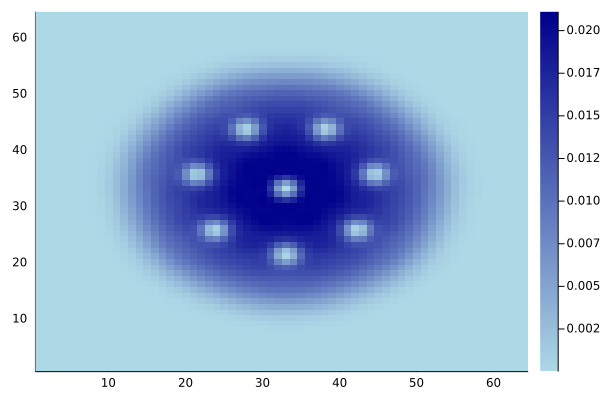

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)